In [36]:
import pandas as pd
import numpy as np
import math
import matplotlib
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [21]:
pg_df = pd.read_csv('pg_stats.csv', index_col = 0)
pg_df = pg_df.drop(['Pos','Tm'], axis=1)
pg_df = pg_df.dropna(how='any')
pg_df

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Joe Young,24,33,0,135,6.9,19.2,0.361,1.3,6.1,0.217,...,0.733,0.3,4.3,4.5,4.0,1.1,0.0,1.3,1.3,18.1
Delon Wright,24,27,0,446,4.0,9.4,0.422,0.8,2.4,0.333,...,0.764,1.3,2.6,3.9,4.6,2.2,0.9,2.0,2.5,12.1
Deron Williams,32,64,44,1657,5.7,13.0,0.438,1.8,5.1,0.363,...,0.826,0.3,2.9,3.2,7.8,0.7,0.2,3.0,3.0,15.2
Isaiah Whitehead,21,73,26,1643,4.5,11.1,0.402,1.0,3.3,0.295,...,0.805,0.7,3.3,4.0,4.2,0.9,0.8,3.1,3.8,11.9
Russell Westbrook,28,81,81,2802,10.6,24.9,0.425,2.6,7.5,0.343,...,0.845,1.8,9.3,11.1,10.8,1.7,0.4,5.6,2.4,32.9
Briante Weber,24,20,0,205,4.4,10.5,0.417,0.2,1.8,0.100,...,0.688,1.4,3.2,4.6,3.7,2.1,0.2,1.4,2.8,10.9
C.J. Watson,32,62,9,1012,3.4,8.8,0.387,1.1,3.7,0.305,...,0.864,0.6,2.6,3.2,4.1,1.5,0.1,1.7,3.0,10.0
John Wall,26,78,78,2836,8.2,18.2,0.451,1.1,3.5,0.327,...,0.801,0.7,3.4,4.1,10.5,2.0,0.6,4.1,1.9,22.9
Kemba Walker,26,79,79,2739,8.5,19.0,0.444,3.2,7.9,0.399,...,0.847,0.6,3.5,4.0,5.7,1.1,0.3,2.2,1.6,24.1


In [29]:
pca = PCA(copy=True, n_components=2, whiten=False)
pca.fit(pg_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
pg_2d = pca.transform(pg_df)
pg_2d_df = pd.DataFrame(pg_2d)
pg_2d_df.index = pg_df.index
pg_2d_df.columns = ['PC1','PC2']
pg_2d_df.head()

,PC1,PC2
Player,,
Joe Young,-1135.414619,-4.262018
Delon Wright,-824.843565,-2.802065
Deron Williams,387.475356,-4.689226
Isaiah Whitehead,373.151937,15.581977
Russell Westbrook,1533.267614,-17.900308


In [31]:
print(pca.explained_variance_ratio_) 

[  9.99443303e-01   3.90012407e-04]


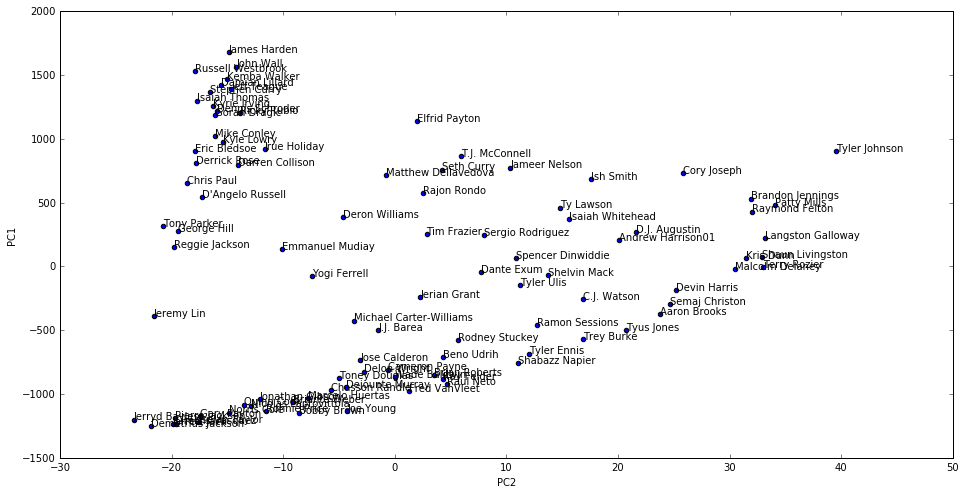

In [35]:
%matplotlib inline
    
ax = pg_2d_df.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
    
for i, country in enumerate(pg_df.index):
    ax.annotate(
        country, 
        (pg_2d_df.iloc[i].PC2, pg_2d_df.iloc[i].PC1)
    )

### K-means

In [37]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit(pg_df)

In [38]:
pg_2d_df['cluster'] = pd.Series(clusters.labels_, index=pg_2d_df.index)

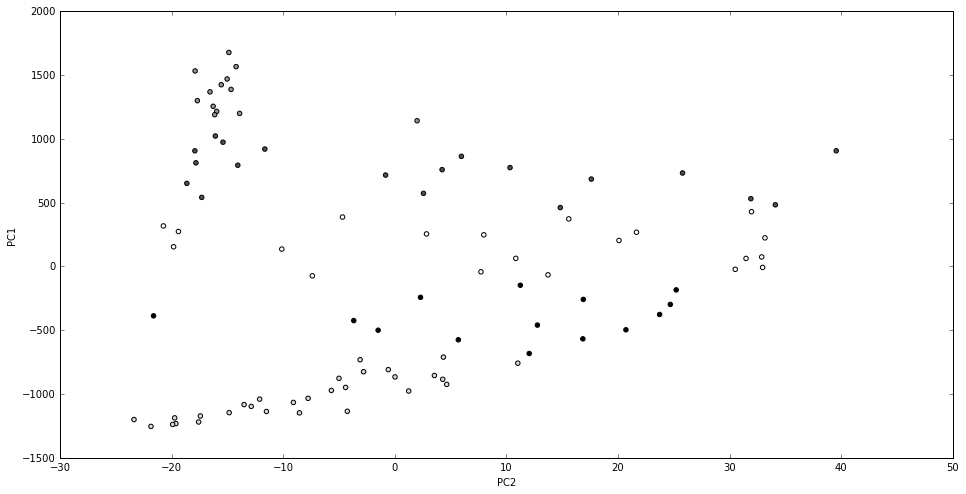

In [40]:
pg_2d_df.plot(
        kind='scatter',
        x='PC2',y='PC1',
        c=pg_2d_df.cluster.astype(np.float), 
        figsize=(16,8))

In [44]:
clusters.get_params(deep=True)

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 5,
 'n_init': 10,
 'n_jobs': 1,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [51]:
sorted_df = pg_2d_df.sort('cluster')
sorted_df.to_csv('clustered_pg.csv', sep='\t', encoding='utf-8')

/Users/hari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
